In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
airbnb = pd.read_csv('Cleaned_Airbnb.csv')
airbnb = airbnb.drop('Unnamed: 0', axis=1)

In [31]:
airbnb

,id,name,host id,[host_name],neighbourhood group,neighbourhood,latitude,longitude,room and type,minimum nights,number of reviews (total),last review (date),reviews per month,floor,noise.dB.,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,1,69.056465,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21,0.38,1,56.054278,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,0.00,1,56.054278,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,2019-07-05,4.64,1,69.056465,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,2018-11-19,0.10,1,56.054278,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39113,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,NaN,0.00,1,69.056465,70
39114,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,4,0,NaN,0.00,1,69.056465,40
39115,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,10,0,NaN,0.00,1,56.054278,115
39116,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1,0,NaN,0.00,1,56.054278,55


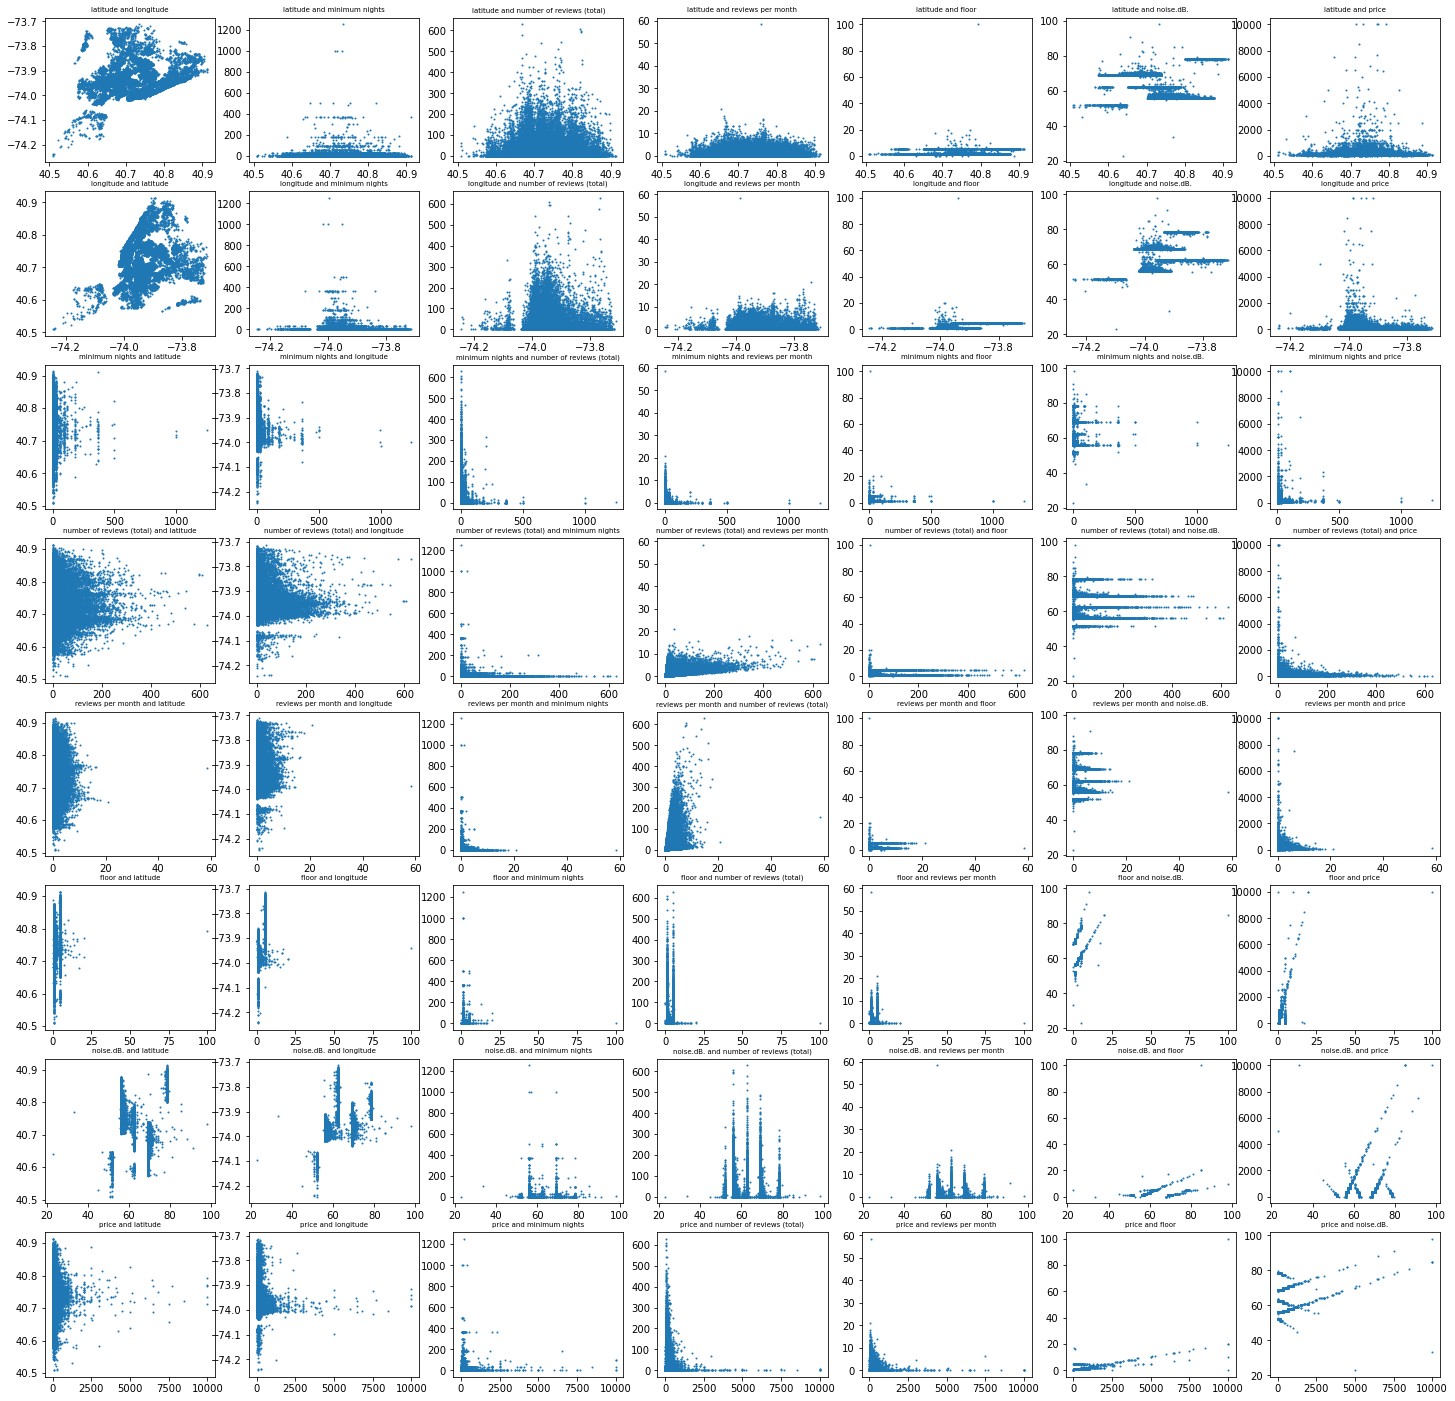

In [82]:
fig, axs = plt.subplots(8, 7, figsize=(25, 25))

x = 0
y = 0

for i in airbnb:
    if airbnb[i].map(type).eq(str).any() or i == 'id' or i == 'host   id':
        continue
    for j in airbnb:
        if i == j:
            continue
        if airbnb[j].map(type).eq(str).any() or j == 'id' or j == 'host   id':
            continue
        #a, b = np.polyfit(airbnb[i], airbnb[j], 1)
        axs[x,y].scatter(airbnb[i],airbnb[j],s=1)
        #axs[x,y].plot(airbnb[i], a*airbnb[j]+b,color='deepskyblue')
        temp = " and "
        title = i + temp + j
        axs[x, y].set_title(title,fontsize=7)
        y += 1
        if y > 6:
            x +=1
            y = 0
        

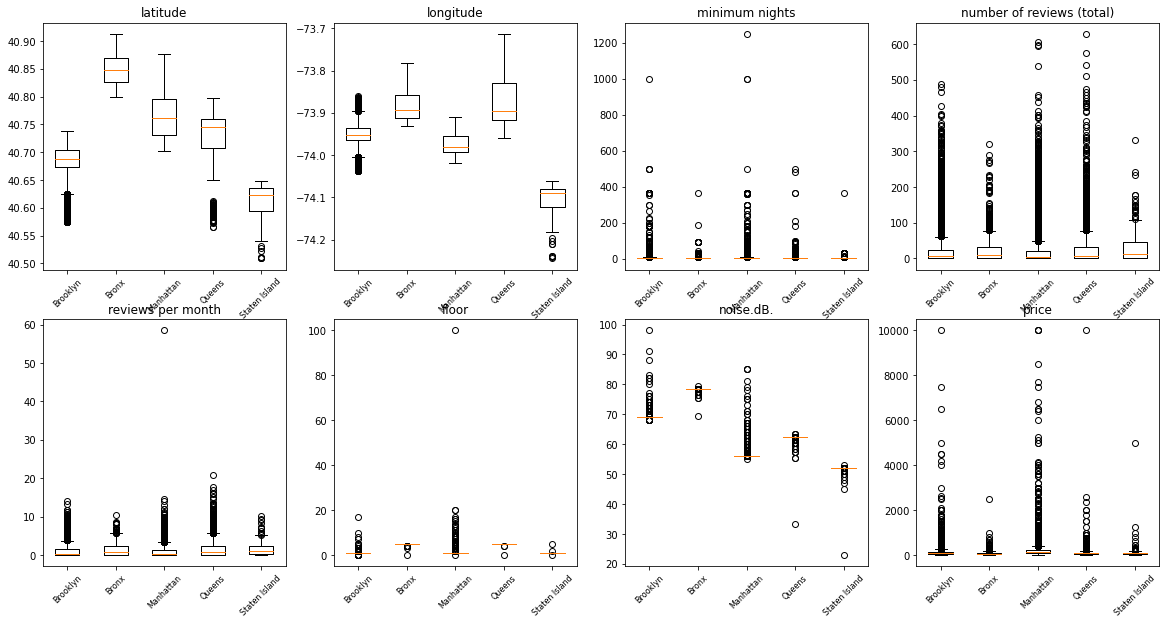

In [89]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

x = 0
y = 0

for i in airbnb:
    if airbnb[i].map(type).eq(str).any() or i == 'id' or i == 'host   id':
        continue
    Brooklyn = airbnb.loc[(airbnb['neighbourhood group'] == 'Brooklyn')]
    Bronx = airbnb.loc[(airbnb['neighbourhood group'] == 'Bronx')]
    Manhattan = airbnb.loc[(airbnb['neighbourhood group'] == 'Manhattan')]
    Queens = airbnb.loc[(airbnb['neighbourhood group'] == 'Queens')]
    Staten = airbnb.loc[(airbnb['neighbourhood group'] == 'Staten Island')]
    axs[x,y].boxplot([Brooklyn[i],Bronx[i],Manhattan[i],Queens[i],Staten[i]])
    axs[x, y].set_title(i)
    ticks = ['Brooklyn','Bronx','Manhattan','Queens','Staten Island']
    axs[x, y].set_xticklabels(np.repeat(ticks, 1),
                    rotation=45, fontsize=8)
    y += 1
    if y > 3:
        y = 0
        x += 1

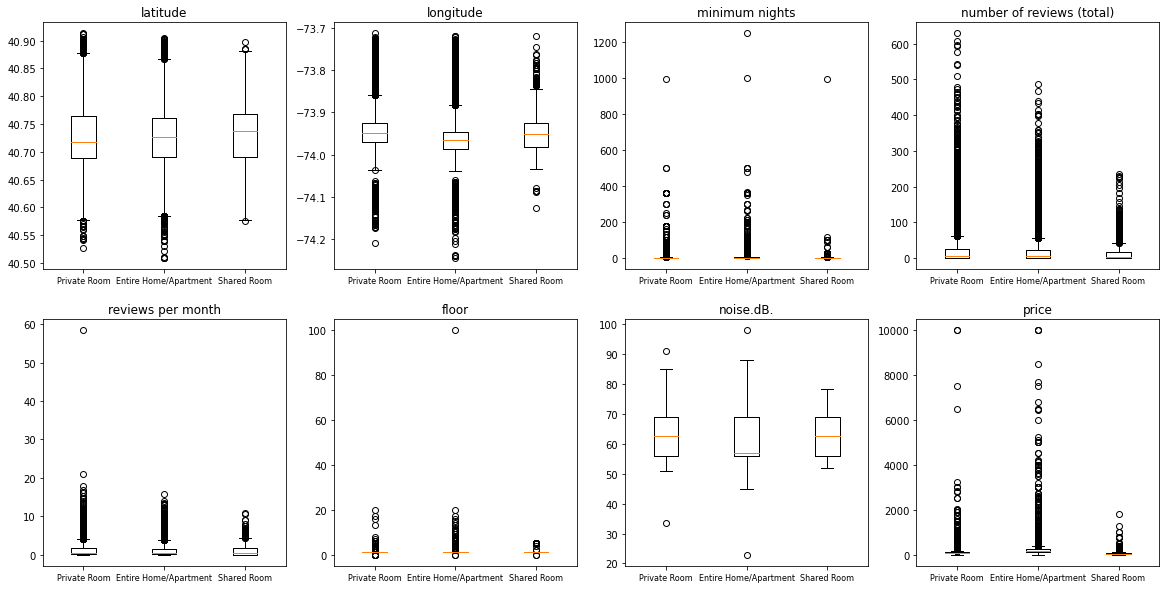

In [87]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

x = 0
y = 0

for i in airbnb:
    if airbnb[i].map(type).eq(str).any() or i == 'id' or i == 'host   id':
        continue
    Priv = airbnb.loc[(airbnb['room and type'] == 'Private room')]
    Entire = airbnb.loc[(airbnb['room and type'] == 'Entire home/apt')]
    Shared = airbnb.loc[(airbnb['room and type'] == 'Shared room')]
    axs[x,y].boxplot([Priv[i],Entire[i],Shared[i]])
    axs[x, y].set_title(i)
    ticks = ['Private Room','Entire Home/Apartment','Shared Room']
    axs[x, y].set_xticklabels(np.repeat(ticks, 1),
                    rotation=0, fontsize=8)
    y += 1
    if y > 3:
        y = 0
        x += 1

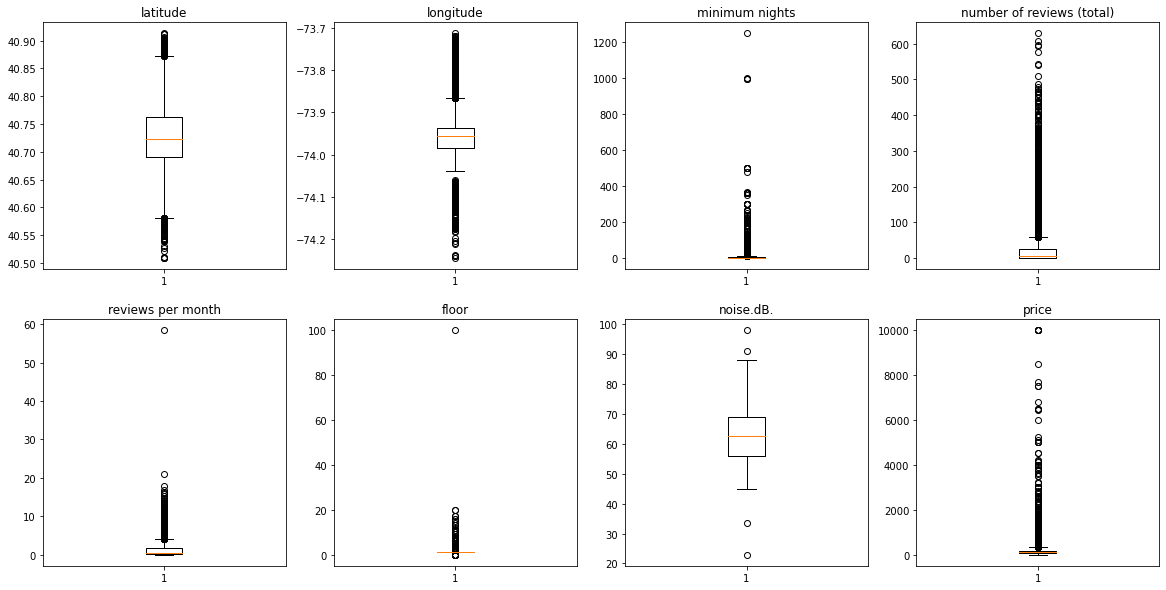

In [90]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

x = 0
y = 0

for i in airbnb:
    if airbnb[i].map(type).eq(str).any() or i == 'id' or i == 'host   id':
        continue
    axs[x,y].boxplot(airbnb[i])
    axs[x, y].set_title(i)
    y += 1
    if y > 3:
        y = 0
        x += 1

In [36]:
airbnb.dtypes

id                             int64
name                          object
host   id                      int64
[host_name]                   object
neighbourhood group           object
neighbourhood                 object
latitude                     float64
longitude                    float64
room and type                 object
minimum nights                 int64
number of reviews (total)      int64
last review (date)            object
reviews per month            float64
floor                          int64
noise.dB.                    float64
price                          int64
dtype: object

In [37]:
airbnb['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

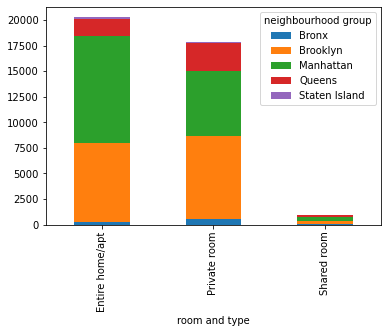

In [38]:
airbnb.groupby(['room and type','neighbourhood group']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

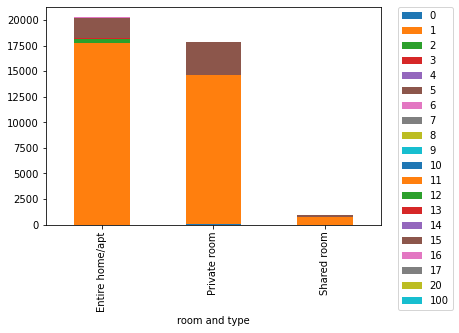

In [73]:
airbnb.groupby(['room and type','floor']).size().unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

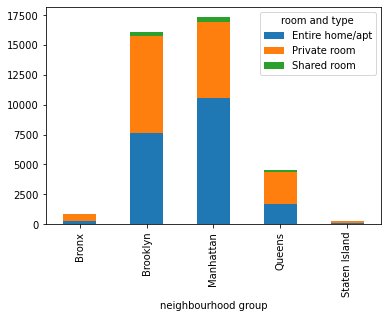

In [39]:
airbnb.groupby(['neighbourhood group','room and type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

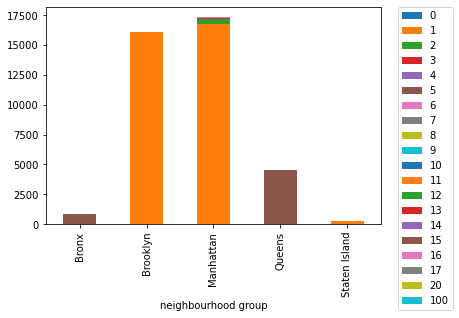

In [72]:
airbnb.groupby(['neighbourhood group','floor']).size().unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [62]:
temp = pd.crosstab(index=airbnb["neighbourhood"],columns=airbnb["neighbourhood group"])

In [64]:
Bronxhood = temp.loc[temp['Bronx'] != 0]
Bronxhood = Bronxhood.drop(['Brooklyn','Queens','Manhattan','Staten Island'], axis=1)
Bronxhood

neighbourhood group,Bronx
neighbourhood,
Allerton,33
Baychester,7
Belmont,21
Bronxdale,13
Castle Hill,8
City Island,14
Claremont Village,19
Clason Point,18
Co-op City,1


In [65]:
Queenshood = temp.loc[temp['Queens'] != 0]
Queenshood = Queenshood.drop(['Brooklyn','Bronx','Manhattan','Staten Island'], axis=1)
Queenshood

neighbourhood group,Queens
neighbourhood,
Arverne,68
Astoria,716
Bay Terrace,5
Bayside,31
Bayswater,12
Belle Harbor,6
Bellerose,12
Breezy Point,2
Briarwood,50


In [66]:
Brooklynhood = temp.loc[temp['Brooklyn'] != 0]
Brooklynhood = Brooklynhood.drop(['Queens','Bronx','Manhattan','Staten Island'], axis=1)
Brooklynhood

neighbourhood group,Brooklyn
neighbourhood,
Bath Beach,16
Bay Ridge,114
Bedford-Stuyvesant,2983
Bensonhurst,61
Bergen Beach,6
Boerum Hill,147
Borough Park,105
Brighton Beach,63
Brooklyn Heights,126


In [67]:
Manhattanhood = temp.loc[temp['Manhattan'] != 0]
Manhattanhood = Manhattanhood.drop(['Queens','Bronx','Brooklyn','Staten Island'], axis=1)
Manhattanhood

neighbourhood group,Manhattan
neighbourhood,
Battery Park City,54
Chelsea,883
Chinatown,294
Civic Center,40
East Harlem,913
East Village,1506
Flatiron District,63
Gramercy,291
Greenwich Village,310


In [69]:
Statenhood = temp.loc[temp['Staten Island'] != 0]
Statenhood = Statenhood.drop(['Queens','Bronx','Brooklyn','Manhattan'], axis=1)
Statenhood

neighbourhood group,Staten Island
neighbourhood,
Arden Heights,4
Arrochar,15
Bay Terrace,1
Bull's Head,4
Castleton Corners,4
Clifton,13
Concord,20
Dongan Hills,6
Eltingville,3
